In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import datetime

In [2]:
do_data = pd.read_csv('DO data.csv')

In [3]:
do_data['dt'] = do_data['year'].astype(str) + '-' + do_data['month'].astype(str) + '-' + \
                do_data['day'].astype(str) + ' ' + do_data['time']

do_data['date'] = pd.to_datetime(do_data['dt'], errors = 'coerce')

do_data = do_data.drop(['dt'], axis = 1)

do_data = do_data.set_index(do_data['date'])

In [4]:
def month_n2s(n):
    if n == 10:
        return 'Oct'
    elif n == 11:
        return 'Nov'
    elif n == 12:
        return 'Dec'
    elif n == 1:
        return 'Jan'
    elif n == 2:
        return 'Feb'
    elif n == 3:
        return 'March'
    elif n == 4:
        return 'April'
    elif n == 5:
        return 'May'
    elif n == 6:
        return 'June'
    elif n == 7:
        return 'July'
    elif n == 8:
        return 'August'
    else:
        return 'Sep'

In [5]:
def day_n2s(n):
    if n == 0:
        return 'Mon'
    elif n == 1:
        return 'Tue'
    elif n == 2:
        return 'Wed'
    elif n == 3:
        return 'Thu'
    elif n == 4:
        return 'Fri'
    elif n == 5:
        return 'Sat'
    else:
        return 'Sun'

In [6]:
time_midnight = datetime.time(0)
time_2am = datetime.time(2)
time_4am = datetime.time(4)
time_6am = datetime.time(6)
time_8am = datetime.time(8)
time_10am = datetime.time(10)
time_noon = datetime.time(12)
time_2pm = datetime.time(14)
time_4pm = datetime.time(16)
time_6pm = datetime.time(18)
time_8pm = datetime.time(20)
time_10pm = datetime.time(22)
time_1159pm = datetime.time(23, 59, 59)

In [7]:
def time2bin(d):
    if time_midnight <= d < time_2am:
        return 'midnight_2AM'
    elif time_2am <= d < time_4am:
        return '2AM_4AM'
    elif time_4am <= d < time_6am:
        return '4AM_6AM'
    elif time_6am <= d < time_8am:
        return '6AM_8AM'
    elif time_8am <= d < time_10am:
        return '8AM_10AM'
    elif time_10am <= d < time_noon:
        return '10AM_noon'
    elif time_noon <= d < time_2pm:
        return 'noon_2PM'
    elif time_2pm <= d < time_4pm:
        return '2PM_4PM'
    elif time_4pm <= d < time_6pm:
        return '4PM_6PM'
    elif time_6pm <= d < time_8pm:
        return '6PM_8PM'
    elif time_8pm <= d < time_10pm:
        return '8PM_10PM'
    elif time_10pm <= d <= time_1159pm:
        return '10PM_midnight'

In [8]:
do_months = do_data.month.map(lambda n : month_n2s(n))

do_data_dayn = do_data.date.map(lambda x : x.weekday())

do_data_days = do_data_dayn.map(lambda x : day_n2s(x))

do_data_timebins = do_data.date.map(lambda t : time2bin(t.time()))

In [9]:
do_data['month_str'] = do_months

do_data['dayofweek_int'] = do_data_dayn

do_data['dayofweek_str'] = do_data_days

do_data['timebins'] = do_data_timebins

In [10]:
do_data.head()

,time,day,month,year,lane 1,lane 2,lane 3,lane 4,lane 5,date,month_str,dayofweek_int,dayofweek_str,timebins
date,,,,,,,,,,,,,,
2004-10-01 00:00:00,12:00:00 AM,1,10,2004,1.72000,1.77,1.83000,2.13000,1.96,2004-10-01 00:00:00,Oct,4,Fri,midnight_2AM
2004-10-01 01:29:28,01:29:28 AM,1,10,2004,1.67000,1.61,2.04999,1.95000,1.80,2004-10-01 01:29:28,Oct,4,Fri,midnight_2AM
2004-10-01 02:58:56,02:58:56 AM,1,10,2004,2.08000,1.79,1.54000,1.79000,2.08,2004-10-01 02:58:56,Oct,4,Fri,2AM_4AM
2004-10-01 04:28:24,04:28:24 AM,1,10,2004,1.66000,1.32,2.21000,2.02999,1.64,2004-10-01 04:28:24,Oct,4,Fri,4AM_6AM
2004-10-01 05:57:52,05:57:52 AM,1,10,2004,2.05999,1.63,1.35000,1.61999,1.91,2004-10-01 05:57:52,Oct,4,Fri,4AM_6AM


In [11]:
do_data.to_csv('do_data_anot.csv')

In [12]:
do_data['date_2'] = do_data.date.map(lambda d : d.date())

In [13]:
do_data_medians = do_data.groupby('date_2').median()

In [14]:
do_data_medians.to_csv('do_data_med.csv')

In [15]:
# do_months = do_data.month.map(lambda n : month_n2s(n))

# do_data_dayn = do_data.date.map(lambda x : x.weekday())

# do_data_days = do_data_dayn.map(lambda x : day_n2s(x))

# do_data_timebins = do_data.date.map(lambda t : time2bin(t.time()))

In [16]:
do_data_medians.head()

,day,month,year,lane 1,lane 2,lane 3,lane 4,lane 5,dayofweek_int
date_2,,,,,,,,,
2004-10-01,1,10,2004,1.820000,1.740000,1.830000,1.820000,1.910000,4
2004-10-02,2,10,2004,1.945000,1.884995,1.894995,1.820000,1.869995,5
2004-10-03,3,10,2004,2.024995,1.545000,1.985000,1.874990,1.849995,6
2004-10-04,4,10,2004,2.225000,1.989995,2.095000,1.969995,1.940000,0
2004-10-05,5,10,2004,1.940000,1.780000,2.080000,1.844995,1.819995,1


In [17]:
do_data_medians['month_str'] = do_data_medians.month.map(lambda n : month_n2s(n))

In [18]:
do_data_medians.head()

,day,month,year,lane 1,lane 2,lane 3,lane 4,lane 5,dayofweek_int,month_str
date_2,,,,,,,,,,
2004-10-01,1,10,2004,1.820000,1.740000,1.830000,1.820000,1.910000,4,Oct
2004-10-02,2,10,2004,1.945000,1.884995,1.894995,1.820000,1.869995,5,Oct
2004-10-03,3,10,2004,2.024995,1.545000,1.985000,1.874990,1.849995,6,Oct
2004-10-04,4,10,2004,2.225000,1.989995,2.095000,1.969995,1.940000,0,Oct
2004-10-05,5,10,2004,1.940000,1.780000,2.080000,1.844995,1.819995,1,Oct


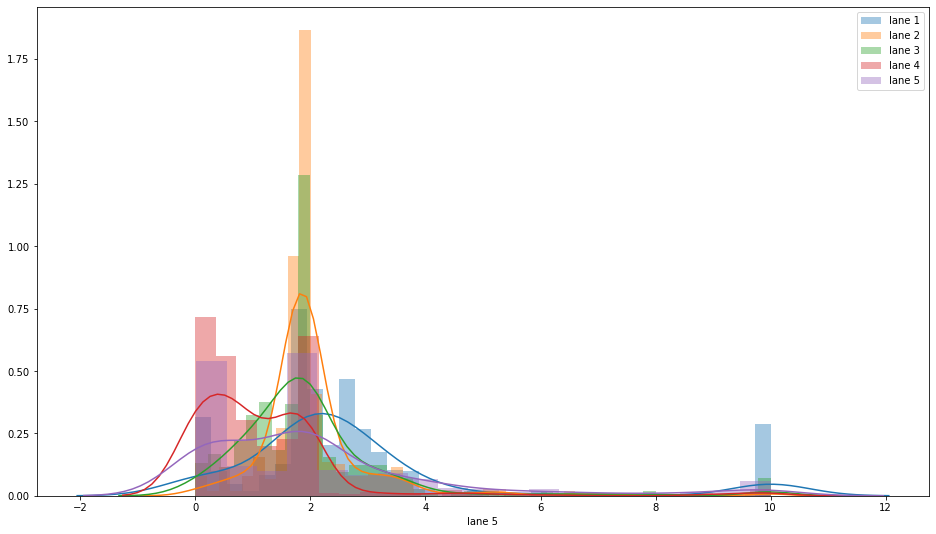

In [19]:
plt.figure(figsize = (16, 9))

sns.distplot(a=do_data_medians['lane 1'], label = 'lane 1')#, rug = True)
sns.distplot(a=do_data_medians['lane 2'], label = 'lane 2')#, rug = True)
sns.distplot(a=do_data_medians['lane 3 '], label = 'lane 3')#, rug = True)
sns.distplot(a=do_data_medians['lane 4'], label = 'lane 4')#, rug = True)
sns.distplot(a=do_data_medians['lane 5'], label = 'lane 5')#, rug = True)

plt.legend()

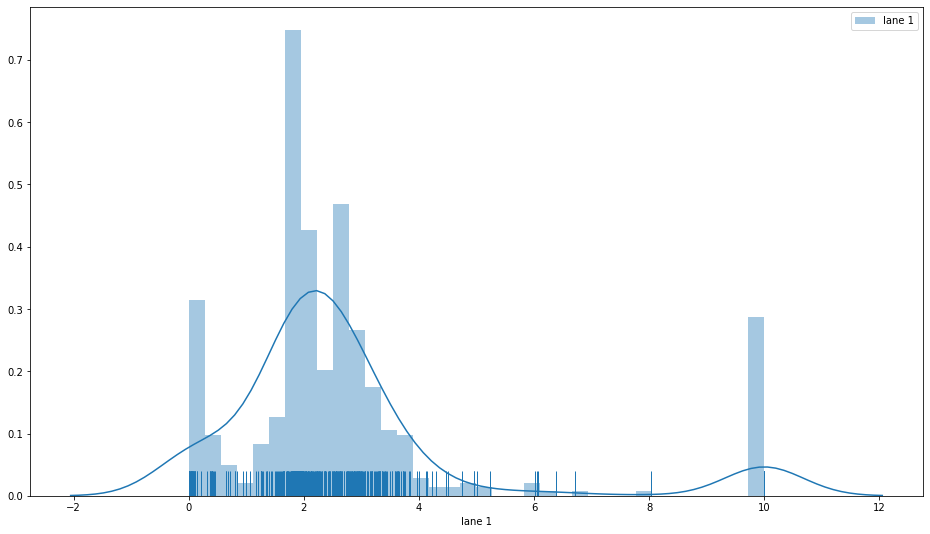

In [20]:
plt.figure(figsize = (16, 9))

sns.distplot(a=do_data_medians['lane 1'], label = 'lane 1', rug = True)
# sns.distplot(a=do_data_medians['lane 2'], label = 'lane 2', rug = True)
# sns.distplot(a=do_data_medians['lane 3 '], label = 'lane 3', rug = True)
# sns.distplot(a=do_data_medians['lane 4'], label = 'lane 4', rug = True)
# sns.distplot(a=do_data_medians['lane 5'], label = 'lane 5', rug = True)

plt.legend()

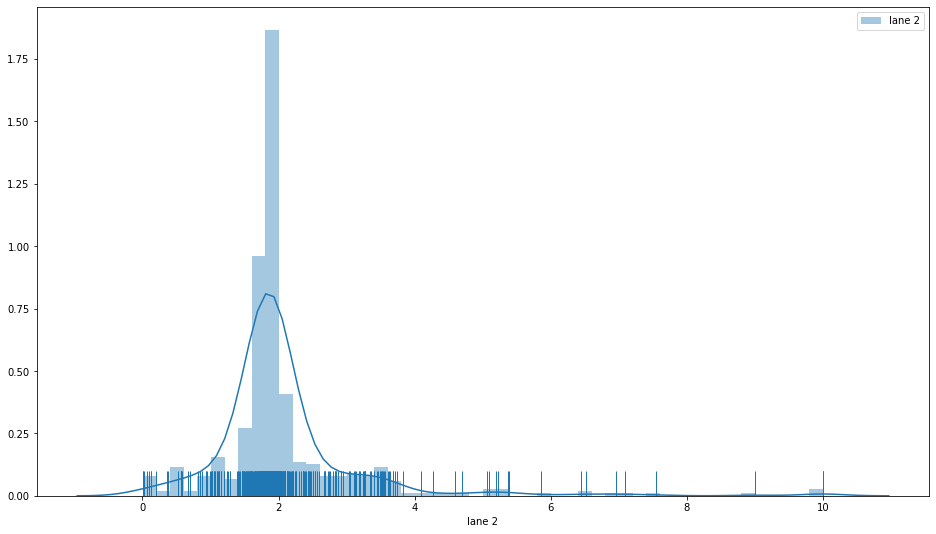

In [21]:
plt.figure(figsize = (16, 9))

# sns.distplot(a=do_data_medians['lane 1'], label = 'lane 1', rug = True)
sns.distplot(a=do_data_medians['lane 2'], label = 'lane 2', rug = True)
# sns.distplot(a=do_data_medians['lane 3 '], label = 'lane 3', rug = True)
# sns.distplot(a=do_data_medians['lane 4'], label = 'lane 4', rug = True)
# sns.distplot(a=do_data_medians['lane 5'], label = 'lane 5', rug = True)

plt.legend()

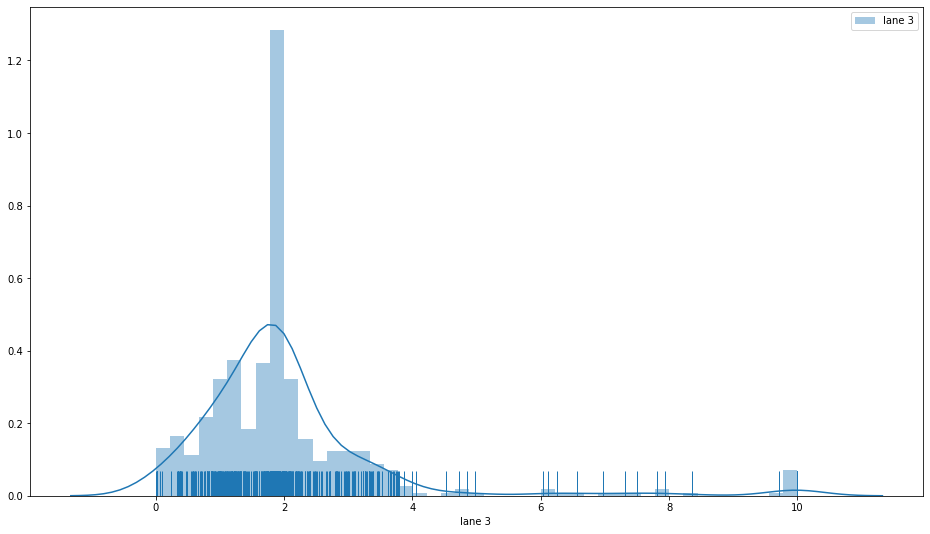

In [22]:
plt.figure(figsize = (16, 9))

# sns.distplot(a=do_data_medians['lane 1'], label = 'lane 1', rug = True)
# sns.distplot(a=do_data_medians['lane 2'], label = 'lane 2', rug = True)
sns.distplot(a=do_data_medians['lane 3 '], label = 'lane 3', rug = True)
# sns.distplot(a=do_data_medians['lane 4'], label = 'lane 4', rug = True)
# sns.distplot(a=do_data_medians['lane 5'], label = 'lane 5', rug = True)

plt.legend()

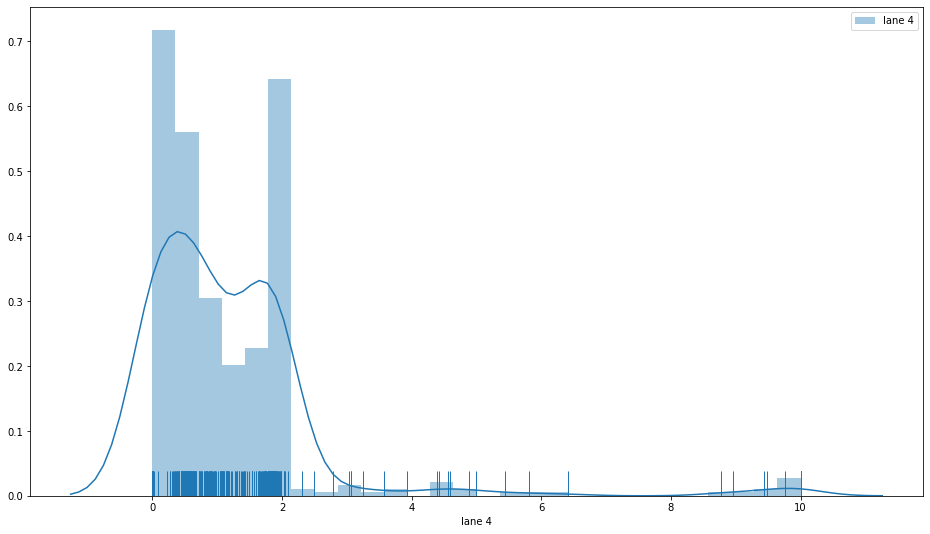

In [23]:
plt.figure(figsize = (16, 9))

# sns.distplot(a=do_data_medians['lane 1'], label = 'lane 1', rug = True)
# sns.distplot(a=do_data_medians['lane 2'], label = 'lane 2', rug = True)
# sns.distplot(a=do_data_medians['lane 3 '], label = 'lane 3', rug = True)
sns.distplot(a=do_data_medians['lane 4'], label = 'lane 4', rug = True)
# sns.distplot(a=do_data_medians['lane 5'], label = 'lane 5', rug = True)

plt.legend()

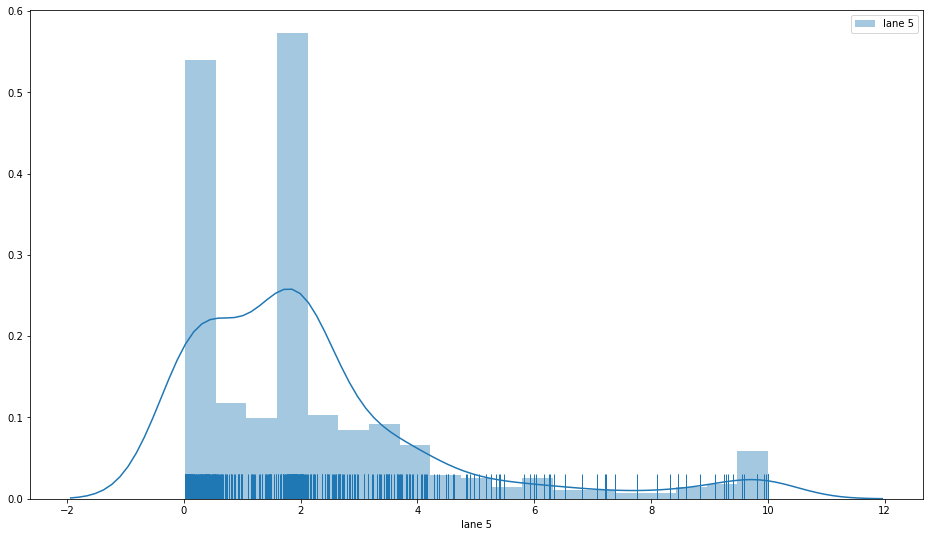

In [24]:
plt.figure(figsize = (16, 9))

# sns.distplot(a=do_data_medians['lane 1'], label = 'lane 1', rug = True)
# sns.distplot(a=do_data_medians['lane 2'], label = 'lane 2', rug = True)
# sns.distplot(a=do_data_medians['lane 3 '], label = 'lane 3', rug = True)
# sns.distplot(a=do_data_medians['lane 4'], label = 'lane 4', rug = True)
sns.distplot(a=do_data_medians['lane 5'], label = 'lane 5', rug = True)

plt.legend()

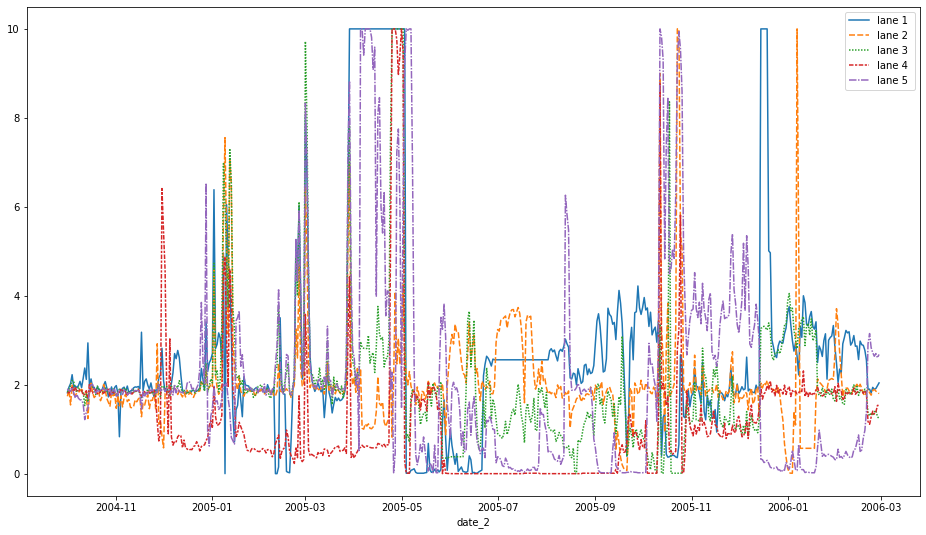

In [25]:
plt.figure(figsize = (16, 9))

sns.lineplot(data = do_data_medians[['lane 1', 'lane 2', 'lane 3 ', 'lane 4', 'lane 5']])